In [12]:
import pymc3 as pm
import pandas as pd
import numpy as np
from numpy import log, exp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

Simulate Poisson Model and try to estimate estimate parameters with ADVI

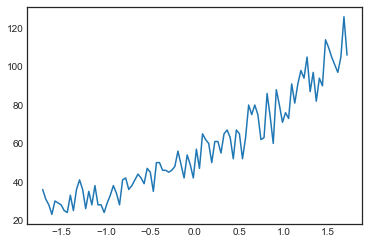

In [13]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import poisson

x = np.ravel(StandardScaler().fit_transform(np.linspace(1, 20, num=100)[:,np.newaxis]))
beta1 = 0.4
beta0 = 4
loglam = beta0 + beta1*x
y = poisson.rvs(np.exp(loglam), size=len(x))
plt.plot(x, y)

In [14]:
pois_mod = pm.Model()

with pois_mod:
    
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=5)
    beta = pm.Normal('beta', mu=0, sd=5)

    # Expected value of outcome
    loglam = alpha + beta*x

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Poisson('Y_obs', mu=np.exp(loglam), observed=y)

In [16]:
with pois_mod:
    fitmod = pm.sample(tuned=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/mqwilber/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
100%|██████████| 1000/1000 [00:01<00:00, 862.65it/s]


In [18]:
pm.summary(fitmod)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,3.970795,0.013534,0.000440,3.943544,3.995951,916.0,0.999056
beta,0.426326,0.013185,0.000523,0.398647,0.449755,393.0,0.999343


In [26]:
with pois_mod:
    approx = pm.fit(n=30000, method="advi")

Average Loss = 342.01: 100%|██████████| 30000/30000 [00:12<00:00, 2394.12it/s] 
Finished [100%]: Average Loss = 342.02


In [27]:
trace = approx.sample(draws=1000)

In [28]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,3.969863,0.016937,0.000489,3.938216,4.003078
beta,0.425265,0.015234,0.000480,0.394915,0.452883


In [29]:
tejondat = pd.read_csv("/Users/mqwilber/Repos/rsf_swine/results/glmdata_by_study/tejon.csv")


In [6]:
?pm.Poisson

In [30]:
from sklearn.preprocessing import StandardScaler
StandardScaler.fit_transform

z = tejondat.z.values
tau = tejondat.tau.values
X = StandardScaler().fit_transform(X=tejondat[["crw", "canopycover_loc"]].values)
X = np.hstack([np.repeat(1, X.shape[0])[:, np.newaxis], X])

In [99]:
X.do

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
poisson_model = pm.Model()

with poisson_model:

    # Priors for unknown model parameters
    #alpha = pm.Normal('alpha', mu=0, sd=5)
    beta = pm.Normal('beta', mu=0, sd=5, shape=3)

    # Expected value of outcome
    loglam = log(tau) + beta[0]*X[:, 0] + beta[1]*X[:, 1] + beta[2]*X[:, 2]

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Poisson('Y_obs', mu=np.exp(loglam), observed=z)

In [32]:
with poisson_model:
    modfit = pm.fit(n=30000, method="advi")

Average Loss = 6.6302e+05: 100%|██████████| 30000/30000 [11:00<00:00, 45.42it/s]
Finished [100%]: Average Loss = 6.6302e+05


In [35]:
trace = modfit.sample(draws=1000)

In [36]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
beta__0,-7.992545,0.069414,0.002286,-8.128548,-7.862440
beta__1,0.703434,0.008938,0.000296,0.686691,0.720562
beta__2,-0.347713,0.003504,0.000117,-0.355038,-0.341472


In [112]:
trace = approx.sample(draws=1000)

In [113]:
trace['beta'].mean(axis=0)

array([-0.77420627,  0.00544302, -0.35309277])

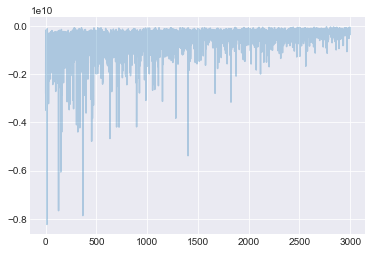

In [81]:
modfit.

([array([  3.,  10.,  49., 165., 271., 260., 165.,  61.,  12.,   4.]),
  array([ 11.,  44., 156., 250., 285., 172.,  62.,  17.,   2.,   1.])],
 array([-1.65134192, -1.32858423, -1.00582653, -0.68306884, -0.36031114,
        -0.03755345,  0.28520424,  0.60796194,  0.93071963,  1.25347733,
         1.57623502]),
 <a list of 2 Lists of Patches objects>)

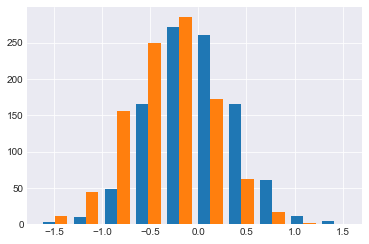

In [87]:
trace = approx.sample(draws=1000)
plt.hist(trace['beta'])

In [56]:
trace.get_values('beta').mean(axis=0)

array([-0.00577454, -0.11692632])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [4]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [6]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/mqwilber/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, beta, alpha]
100%|██████████| 1000/1000 [00:01<00:00, 691.44it/s]
